In [14]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from utils import plot_line, plot_bar, plot_step

# Why probability 

In **probability** we assume a data generation process by which we "create" data. In short:

- we know a model
- we generate data using this model

In **statistical inference** we do the opposite. 

- we have data
- we want to learn about the data generation process, i.e. what is the model?

Often **quantitiatve research** deals with data with the goal to infer the data generation process / the model underlying the data. 

**Easy example**: coin flip.

- Probability: we assume a random process that creates us coin flip data. We could, for example, assume it is a fair coin and 

- Inference: we have coin flip data and want to infer whether or not the coin is fair

**More realistic examples**:

- what are factors affecting customers to cancel a energy contract and switch to a competitor?

- are women with equal qualifications more likely to receive less salary 

It is, therefore, important that we have a good understanding of **probability** and **probability distributions** when conducting data analysis and infering from data. 

The following section will therefore briefly repeat$^*$ several basic and important concepts. Once we have done so we will be able to:

1. deal with uncertainties in our analysis / data 

2. interpret our analyses and models

3. simulate data to support our data analysis

($^*$it is again assumed that you have covered basic concepts of probability in a bachelor course)

# Probability distributions

## Definition probability

(Note: this section is largely taken from Imai (2017))

**Probability** is a measure of uncertainty. There are two basic ways to interpret probability:

1. **Frequentist view**: probability represents the limit of the relative frequency with which an event of interest occurs when the number of experiments repeatedly conducted under the same conditions aproaches infinity.

2. **Bayesian view**: probability is one's subjective belief about the likelihood an event occurs.



The definition of probability requires the following three concepts:

1. **experiment**: an action or a set of actions that produce stochastic events

2. **sample space**: a set of all possible outcomes of the experiment, typically denoted by $\Omega$

3. **event**: a subset of the sample space

A **random variable** assigns a numeric value to each event of the experiment. These values represent mutually exclusive and exhausitve events, together forming the entire sample space. A **discrete random variable** takes a finite or at most countably infinite number of distinct values, whereas a **continuous random variable** assumes an uncountably infinite number of values. 

Once we define a random variable, we can formalize a **probability model** using the distribution of the random variable. 

Examples of **discrete** random variables:

| Experiment                       | Random variable ($x$)           | Possible values for random variable |
|----------------------------------|---------------------------------|-------------------------------------|
| Contact five customers           | # of customers placing an order | $0, 1, 2, 3, 4, 5$                    |
| Inspect a shipment of 10 iPhones | # of defective devices     | $0, 1, 2, \cdots, 9, 10$                   |
| Operate a theme park for one day | # of customers             | $0, 1, 2,\ldots$                        |
| Sell a laptop                    | Gender of customers             | $0$ if female, $1$ if male              |

Examples of **continous** random variables:

| Experiment                  | Random variable ($x$)                             | Possible values for random variable |
|-----------------------------|---------------------------------------------------|-------------------------------------|
| Operate a McDonald's        | Time between customer arrivals in minutes         | $x \geq 0$                          |
| Fill a coffee mug           | Number of ml                                      | $0 \leq x \leq 500ml$               |
| Construct a new library     | Percentage of project complete after six months   | $0 \leq x \leq 100$                 |
| Test a new chemical process | Temperature when the desired reaction takes place | $-3 C^{\circ} \leq 120 C^{\circ}$   |


Let's look at some (selected) important distributions.

## Characterization of probability distributions

There are two important functions which are helpful in characterizing probability distributions:

1. Probability mass / density function

3. Cumulative distribution function

### Probablity mass / density function

Probablity mass funtion (**PMF**): a function that gives the probability that a discrete random variable is exactly equal to one value $x$. 

Example:

![two dice](./../../_assets/Two_dice.png)

Note that the sum of all bars must equal to 1 given the probability of all events occuring must be equal to 1. 

Probability density function (**PDF**): a function that specifies the probability of a continous random variable falling within a particular range of values (given the probabiltiy of a continuous random variable is zero)

Example:

![normal_dist](./../../_assets/Normal_distribution.png)

In summary, probability mass / density functions are:

- defined for any outcome of an experiment ($x$)

- assign a probability to every possible $y$ (or range of $x$)

- a function $f(x)$ such that:

    - $f(x) \geq 0$ for any $x$ 
    
    - discrete: $x$: $\sum_{\text{all x}} f(x) = 1$;(sum of the heights is equal to 1)
    
    - continous: $\int_{-\infty}^{\infty} f(x)dx = 1$; (area under the curve is equal to 1)

### Cumulative distribution function

Unlike the PMF the CDF gives you the probability that a random variable less than or equal $x$. 

For a **discrete** distribution the CDF can be written as:

$$F(x) = \sum_{i=0}^x f(i)$$

for a discrete distribution the CDF is a step function where the function is flat and then jumpys ate each nonnegative integer value.

Here is an example of the cumulative distribution function of the binomial distribution with $n=5$ and $p=0.5$


![cdf_binomial](./../../_assets/Binomial_cdf.png)

The horizontal axis is the allowable domain for the given probability function. Given the vertical axis is a probability, it must fall between 0 and 1. It increases from zero to one as we go from left to right on the horizontal axis.


For a **continous** distribution the CDF can be expressed as:

$$F(x) = \int_{-\infty}^{x} f(t)dt$$

Here is an example of the cumulative distribution function of the normal distribution with $\mu=0$ and $\sigma=1$:

![cdf_normal](./../../_assets/Normal_cdf.png)

## Selected distributions

### Binomial distribution

Binomial outcomes are important to model, since they represent, inter alia, fundamental decisions such as stay or switch, buy or don't buy


With a binomial distribution we mean a random variable $X$ where:

$X$ = The number of outcomes $y$ in $n$ binomial experiment

Recall that a **binominal experiment** exhibits the following properties:

1. The experiment consists of a sequence of $n$ identical trials
2. Two outcomes are possible on each trial (success, failure)
3. The probablity of a success, denoted by $p$, does not change from trial to trial (also the probability of failure - $1-p$ - does not change)
4. The trials are independent


#### Probability mass function

The *probabilty mass function* of a binomial random variable $x$ with probability $p$ and $n$ trials is given by:

$$f(x) = P(X = x) = \binom{n}{x}p^x(1-p)^{n-x}$$


Recall that the binominal coefficient is defined as: $$\binom{n}{x} = \frac{n!}{x!(n-x)!}$$

Example: assume we flip a coin 5 times. How many different combinations are there to get 2 heads out of 5 flips?

- HHTTT
- HTHTT
- HTTHT
- HTTTH
- THHTT
- THTHT
- THTTH
- TTHHT
- TTHTH
- TTTHH

There are $10$ unique ways to receive 2 heads out of 5 flips. This can be calculated by:

\begin{equation}
    \binom{5}{2} = \frac{5!}{2!(5-2)!} = 10
\end{equation}

**Example**: Binomial distribution

We are a producer of lawn mow roboters. In the next month we are required to produce $100$ robots. Over the last couple of years the defect rate was 5%.


**Question:** What is the probability of producing 

1. **$0$** defective robots next month?

2. **$100$** defective robots next month?

3. **$5$** defective robots next month?

**Probablity of $0$ or $100$ defects**

For the edge cases $0$ and $100$ it is easy to come up with the solution as these are single events that either occur or do not occur. 

In [7]:
p_0 = 0.05**0 * (1-0.05)**100
p_0

0.0059205292203339975

In [8]:
p_100 = 0.05**100 * (1-0.05)**0
p_100

7.888609052210162e-131

**Probablity of exactly $5$ defects**

There are many combinations how 5 defects could occur. It could be the first 5 robots or the last 5 robots or many other any other combination of 5 robots out of 100. Therefore, we need the binomial coefficient $\binom{n}{x}$. 

In Python this can be done as follows:

In [37]:
n = 100
x = 5
n_combs = math.comb(100,5)
print("There are", n_combs, "combinations to encounter 5 defects in 100 robots.")

There are 75287520 combinations to encounter 5 defects in 100 robots.


We can easily put the definition of the probability mass function into a python function:

In [38]:
def binom_pmf(n,x,p):
    'Probablity mass function for binomial random variable'
    return math.comb(n,x) * p**x * (1-p)**(n-x)

In [39]:
n = 100
x = 5
p = 0.05
binom_pmf(n,x,p)

0.1800178272704284

The probability that 5 out of 100 robots produced are defective is $~18\%$. 

---

Let's see what the probability mass function for all possible outcomes looks like for our experiment. 

We can use this function to calculate the probabilities for all other possible events.

In [40]:
outcomes = np.arange(0,101,1) # 0 to 100 defects are possible events
probs = np.empty(n+1)
for i, x in enumerate(outcomes):
    probs[i] = binom_pmf(n,x,p)

In [41]:
probs[0], probs[5], probs[-1] # check if results match our previous results

(0.0059205292203339975, 0.1800178272704284, 7.888609052210162e-131)

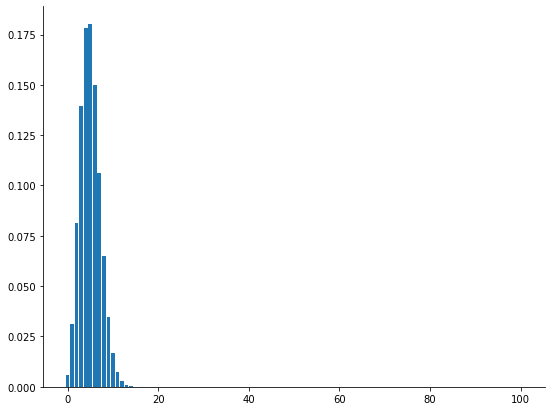

In [42]:
plot_bar(outcomes, probs);

**Important**

With large $n$ and provided that $p$ is not too close to the edges $0$ or $1$, the binomial distribution can be approximated by the *normal distribution*

Here is an example for the probablity mass function for $n=1.000$ and $p=50\%$

![binom_largeN](../../../_assets/Binom_large_n.png)

#### Cumulative distribution function

The cumulative distribution function of a binomial random variable $x$ with probability $p$ and $n$ trials can be written as:

$$F(x) = P(X \leq x) = \sum_{k=0}^{x}\binom{n}{k}p^k(1 - p)^{n-k}$$



As you can see this is the sum of the PMFs. 

**Example**: 

We are a producer of lawn mow roboters. In the next month we are required to produce $100$ robots. Over the last couple of years the defect rate was 5%.


**Question:** What is the probability of producing 

1. less than $5$ defective robots next month?


In [59]:
x = 5
probs[:x]

array([0.00592053, 0.03116068, 0.08118177, 0.13957568, 0.17814264])

In [60]:
# Probability of less than 5 defects
sum(probs[:x]) 

0.4359813006857

----

Let's plot the CDF for our problem:

We can easily do this by taking the cumulative sum of the probabilities (use `np.cumsum`)

In [48]:
# Example of np.cumsum
data = np.array([1,2,3,4,5])
np.cumsum(data)

array([ 1,  3,  6, 10, 15])

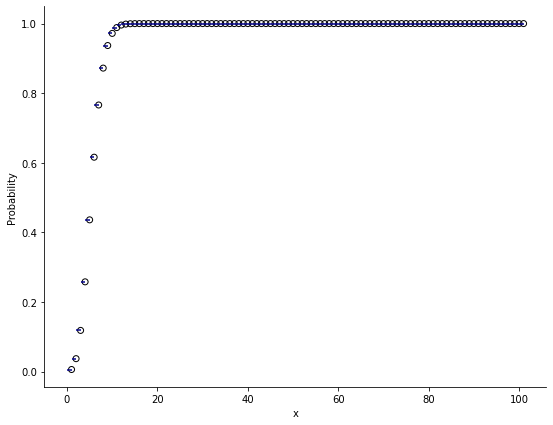

In [51]:
cum_probs = np.cumsum(probs)
plot_step(outcomes,cum_probs, xlabel="x", ylabel="Probability");

#### Mean and variance of binomial distribution

How many defective parts do we expect when producing $100$ lawnn robots?

For one production unit we do expect $5\%$ defective part; in $n = 100$ production units we, therefore, expect $n\times0.05=5$ defective parts. 

The **mean** of a binomial distribution is, therefore,  defined as:

$$E(x) = n p$$

The **variance** of a binomical distribution is defined as:

$$np(1-p)$$

Let's calculate the mean and variance for our example:

In [6]:
# mean
mu = n*p
mu

NameError: name 'n' is not defined

In [71]:
var = n*p*(1-p)
var

4.75

#### Using `scipy.stats` for probability distributions

So far we have implemented both pmf and cdf from scratch to illustrate the key idea of 

- the binomial distribution and

- the ways how to implement these ideas directly into python

From now on we will use existing modules to help us with probablity distribution (and simulation).

Using `scipy.stats` module it is even easier to calculate the key characteristics of probability distributions

We only need to:

1. indicate which probability distribution we need

2. call the `pmf` or `cdf` function or

3. call `mean` and `var`/`std` functions



Let's recalculate our lawn robot example using `scipy.stats`

In [34]:
import scipy.stats as stats

In [52]:
n = 100
p = 0.05
bdist = stats.binom(n,p) # specify probability distribution with n=100 and p=0.05

What is the probability of

- exactly $5$ defects

- less than $5$ defects

In [53]:
bdist.pmf(5)

0.18001782727043672

In [54]:
bdist.cdf(5)

0.6159991279561405

We can apply `pmf` and `cdf` on multiple x if we want to

In [55]:
xs = np.arange(0,n+1)
probs = bdist.pmf(xs)

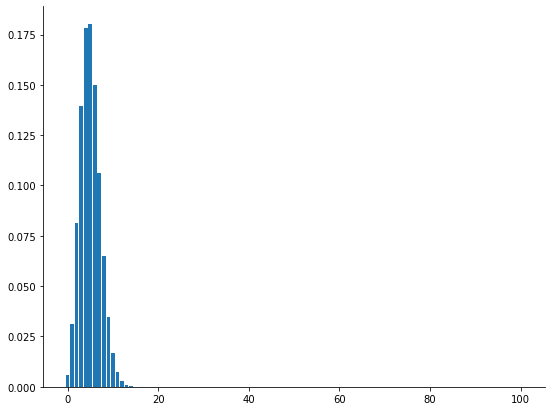

In [56]:
plot_bar(xs,probs);

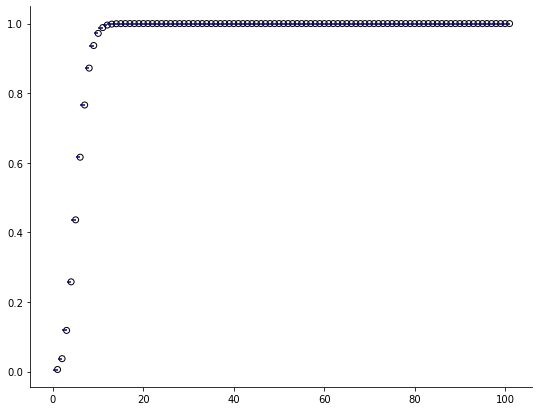

In [61]:
cum_probs = bdist.cdf(xs)
plot_step(xs,cum_probs);

Calculating mean and variance of our binomial distribution is easy:


In [72]:
bdist.mean(), bdist.var()

(5.0, 4.75)

## Simulation

We often use simulation in order to understand the data generation process. However, simulation can help for many other things:

- understand the assumed data generation process

- to solve probability problems

- to evaluate estimators: when we apply some function on the data we infer / receive the estimator (which is the function that makes up the data). We can use simulation to see if our function is good or bad by simulating a model and then esti

- 


In order to understand the **data generation process** or the model of the data we as researchers are given it is often helpful to simulate the data from the model that is assumed.

We is sim

In [144]:
n = 40
same_day = 0
diff_day = 0
for i in range(1000):
    bdays = np.random.randint(0,365,size=n)
    if len(np.unique(bdays)) != n:
        same_day += 1
    else:
        diff_day += 1
same_day/1000 

0.891

0.498

In [92]:
coin_data = np.random.choice([0,1,2],p=[0.4999,0.4999,0.0002], size=10_000)

In [93]:
np.bincount(coin_data)

array([4940, 5059,    1])

In [111]:
dice = stats.binom(200,0.9)

In [112]:
n = 10_000
data = dice.rvs((n,100))

In [113]:
np.sum(data,axis=0)

array([1799797, 1800777, 1799945, 1799487, 1800438, 1799952, 1800952,
       1798990, 1800134, 1800289, 1799561, 1799935, 1800193, 1799674,
       1799922, 1799728, 1799547, 1799982, 1800079, 1799800, 1800032,
       1799539, 1800409, 1800290, 1800387, 1800172, 1799941, 1800233,
       1800307, 1800201, 1800488, 1799942, 1800287, 1800280, 1800470,
       1800260, 1800201, 1800139, 1800289, 1799875, 1800259, 1800172,
       1799837, 1800039, 1799735, 1800551, 1799649, 1799976, 1800629,
       1799920, 1800504, 1799861, 1799810, 1799903, 1800911, 1799121,
       1799705, 1799699, 1799678, 1799933, 1799600, 1799998, 1799531,
       1800469, 1800053, 1799589, 1800397, 1800178, 1800199, 1800078,
       1800143, 1799914, 1800698, 1798985, 1799549, 1800318, 1800967,
       1800274, 1800188, 1799785, 1800409, 1799620, 1799648, 1799875,
       1799945, 1800158, 1800065, 1800576, 1799298, 1800118, 1799844,
       1799468, 1800889, 1799236, 1799803, 1800272, 1799542, 1800112,
       1799851, 1800

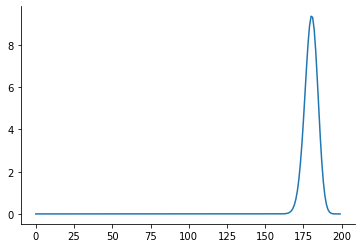

In [114]:
x = np.arange(0,200)
plt.plot(dice.pmf(x)*100)
sns.despine()

In [115]:
dice.pmf(x)*100

array([1.00000000e-198, 1.80000000e-195, 1.61190000e-192, 9.57468600e-190,
       4.24397957e-187, 1.49727599e-184, 4.37953228e-182, 1.09238048e-179,
       2.37183112e-177, 4.55391574e-175, 7.82818116e-173, 1.21692634e-170,
       1.72499309e-168, 2.24514486e-166, 2.69898485e-164, 3.01206709e-162,
       3.13443232e-160, 3.05330584e-158, 2.79377484e-156, 2.40852799e-154,
       1.96174605e-152, 1.51334695e-150, 1.10818270e-148, 7.71873342e-147,
       5.12330931e-145, 3.24612878e-143, 1.96640493e-141, 1.14051486e-139,
       6.34207728e-138, 3.38535712e-136, 1.73668820e-134, 8.57139660e-133,
       4.07409195e-131, 1.86667486e-129, 8.25180091e-128, 3.52234016e-126,
       1.45296532e-124, 5.79615353e-123, 2.23762032e-121, 8.36525751e-120,
       3.03031453e-118, 1.06430559e-116, 3.62624120e-115, 1.19918953e-113,
       3.85103365e-112, 1.20152250e-110, 3.64374758e-109, 1.07451790e-107,
       3.08252324e-106, 8.60590160e-105, 2.33908406e-103, 6.19169309e-102,
       1.59674239e-100, 4